In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

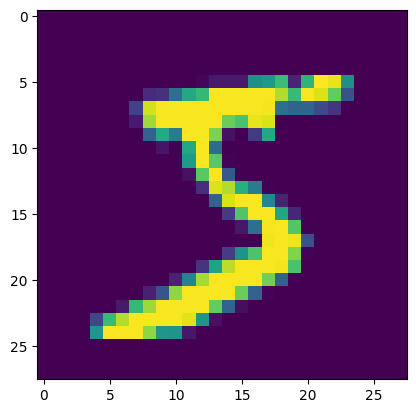

In [6]:
plt.imshow(x_train[0])

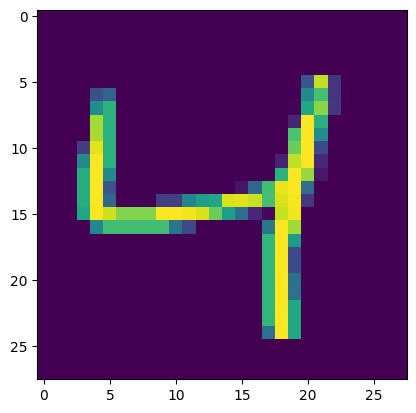

In [7]:
plt.imshow(x_train[2])

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [10]:
model=models.Sequential()

In [11]:
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(layers.MaxPooling2D(2,2))

In [13]:
model.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))

In [14]:
model.add(layers.MaxPooling2D(2,2))

In [15]:
model.add(layers.Flatten())

In [16]:
model.add(layers.Dense(64,activation='relu'))

In [17]:
model.add(layers.Dense(10,activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8993 - loss: 0.3302 - val_accuracy: 0.9814 - val_loss: 0.0581
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 26ms/step - accuracy: 0.9839 - loss: 0.0538 - val_accuracy: 0.9874 - val_loss: 0.0377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9894 - val_loss: 0.0309
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9902 - val_loss: 0.0305
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9912 - val_loss: 0.0325
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9959 - loss: 0.0146 - val_accuracy: 0.9920 - val_loss: 0.0308
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9898 - val_loss: 0.0388
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9976 -

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
y_prob=model.predict(x_test)
y_preb=y_prob.argmax(axis=1)
y_preb

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preb)

0.9921

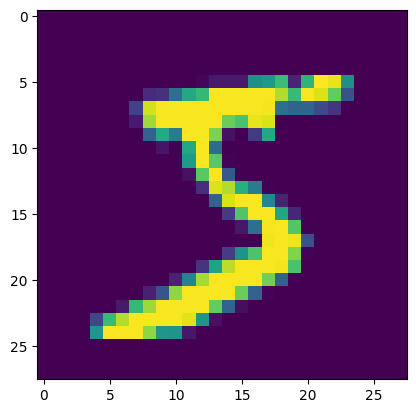

In [25]:
plt.imshow(x_train[0])

In [26]:
y_pred_single = model.predict(x_test[0].reshape(1, 28, 28, 1))
predicted_class = y_pred_single.argmax(axis=1)
print(f"The predicted class for the image is: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The predicted class for the image is: 7
